# Laboratorium 2


### Konfiguracja

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js
import time

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in self.scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in self.scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [196]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

<IPython.core.display.Javascript object>


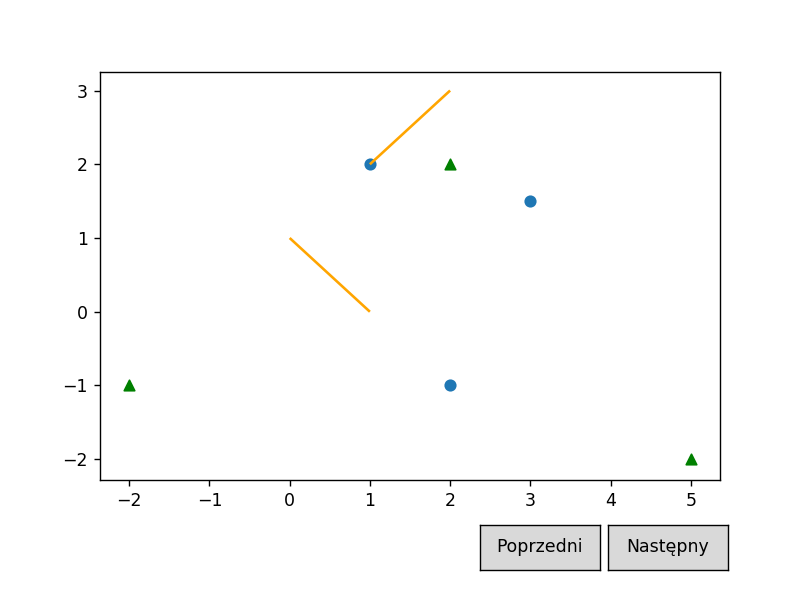

In [197]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


### Rozwiązanie

In [198]:


def getRectangle(pointsQuantity, vertices):
    # przyjmuję wierzchołki w takiej kolejności jak w pierwotnym 
    # przykładzie i zakładam że boki prostokąta są równoległe do osi
    rectangle = []
    points = [np.random.randint(0,4) for x in range(pointsQuantity)]
    for x in points:
        if x == 0:
            y = np.random.uniform(vertices[1][1],vertices[0][1])
            rectangle.append((vertices[0][0],y))
        if x == 1:
            x = np.random.uniform(vertices[1][0],vertices[2][0])
            rectangle.append((x,vertices[1][1]))
        if x == 2:
            y = np.random.uniform(vertices[2][1],vertices[3][1])
            rectangle.append((vertices[2][0],y))
        if x == 3:
            x = np.random.uniform(vertices[0][0],vertices[3][0])
            rectangle.append((x,vertices[0][1]))
    return rectangle

In [199]:
def getCrossSquare(pSides, pCross, vertices):
    #zakładam że wierzchołki kwadratu są przekazane w taki sposób 
    # jaw przykładzie z zadania 1
    square = []
    square +=[(vertices[0][0],np.random.uniform(vertices[0][1],vertices[3][1])) for x in range(pSides)]
    square += [(np.random.uniform(vertices[0][0],vertices[1][0]),vertices[0][1]) for x in range(pSides)]
    square += [(vertices[0][0]+x,vertices[0][1]+x) for x in np.random.uniform(0,vertices[2][0]-vertices[0][0],pCross)]
    square += [(vertices[3][0]+x,vertices[3][1]-x) for x in np.random.uniform(0,vertices[1][0]-vertices[3][0],pCross)]
    return square

In [229]:
def getRandomPoints(pointsQuantity, leftBorder, rightBorder):
    randPoints = [(np.random.uniform(leftBorder,rightBorder)
                   ,np.random.uniform(leftBorder,rightBorder)) 
                  for x in range(pointsQuantity)]
    return randPoints


In [230]:
def getCirclePoints(pointsQuantity, circleCenter, radius):
    pointsCircle = [(radius*np.sin((np.pi/2)*x)+circleCenter[0],
                     radius*np.cos((np.pi/2)*x)+circleCenter[1])
                    for x in np.random.uniform(0,4,pointsQuantity)]
    return pointsCircle


<IPython.core.display.Javascript object>


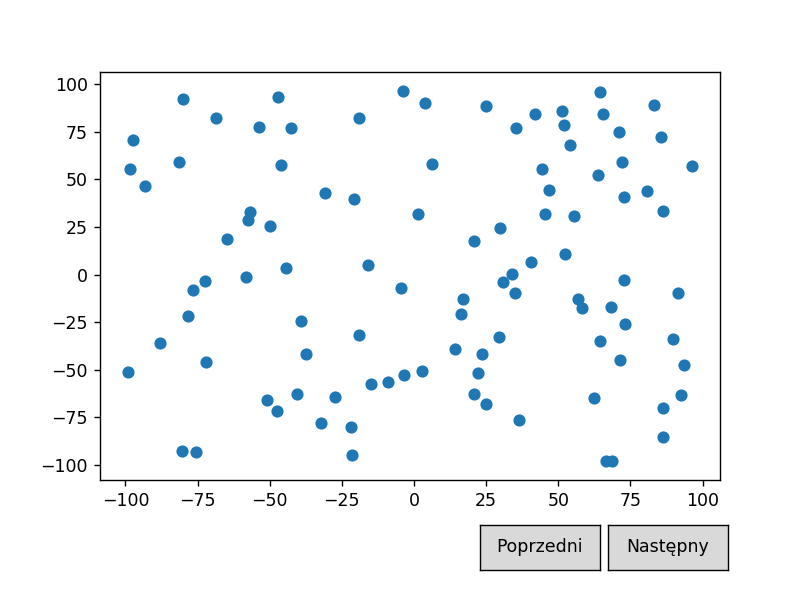

In [369]:
%matplotlib notebook

randPoints = [(np.random.uniform(-100,100),np.random.uniform(-100,100)) for x in range(100)]

pointsCircle = getCirclePoints(20,(0,0),10)
square = getRectangle(100,[(20,20),(20,-20),(40,-20),(40,20)])

crossSquare = getCrossSquare(25,20,[(20,20),(30,20),(30,30),(20,30)])

scenes = [Scene([PointsCollection(randPoints)]),
          Scene([PointsCollection(pointsCircle)]),
          Scene([PointsCollection(square)]),
          Scene([PointsCollection(crossSquare)])]
plot1 = Plot(scenes)
plot1.draw()

In [203]:
def determiner1(a,b,c):
    return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - a[0]*c[1] - a[1]*b[0] - b[1]*c[0]

In [204]:
'''def sortPoints(points):
    points.sort(key=lambda x: int (x[1]))
    points.sort(key=lambda x: int (x[0]))
    return points
'''
def squaredDist(a,b):
    return (a[0]-b[0])**2 + (a[1]-b[1])**2

def bottomLeft(points):
    minPoint = points[0]
    minPointId = 0
    for i in range (len(points)):
        if(points[i][1] < minPoint[1]):
            minPoint = points[i]
            minPointId = i
        elif(points[i][1] == minPoint[1] and points[i][0] > minPoint[0]):
            minPoint = points[i]
            minPointId = i
    return minPoint,minPointId

In [205]:
def orientation(b,c,det,a,eps):
    if(abs(det(a,b,c)) <= eps):
        if(squaredDist(a,b) > squaredDist(a,c)):
            return 1
        else:
            return -1
    else:
        if(det(a,b,c) > eps):
            return 1
        else:
            return -1

[(9, 9), (8, 8), (7, 7), (6, 6), (5, 5), (4, 4), (3, 3), (2, 2), (1, 1), (0, 0)]


<IPython.core.display.Javascript object>


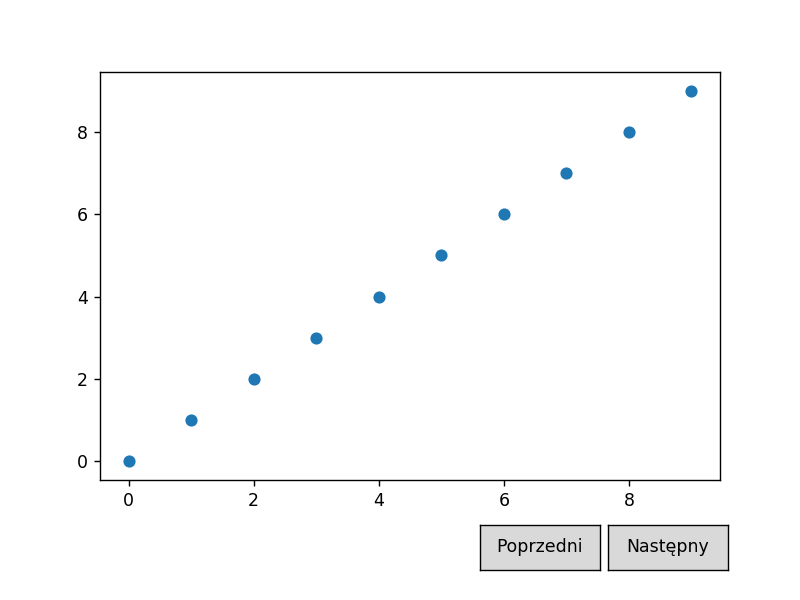

In [206]:
import functools # functools.partial

compare = functools.partial(orientation,det=determiner1, a=(0,0), eps=0.01)
#newPoints = [(np.random.uniform(0,5),np.random.uniform(0,5)) for i in range(10)]
newPoints = [(i,i) for i in range(10)]
#pointsToSort = randPoints.copy()

print(sorted(newPoints, key=functools.cmp_to_key(compare), reverse = True))

scenes=[Scene([PointsCollection(newPoints)])]

plot = Plot(scenes)
plot.draw()


In [289]:


def pushToConvexHull(convexHull, point, eps):
    detResult = determiner1(convexHull[-2], convexHull[-1], point)
    
    while(detResult < -eps):
            convexHull.pop()
            detResult = determiner1(convexHull[-2], convexHull[-1], point)
    
    if(abs(detResult)<= eps):
        convexHull.pop()
        convexHull.append(point)
    elif(detResult > 0):
        convexHull.append(point)
    

def Graham(points,epsilon):
    convexPoints = points.copy()
    minimalpoint,_ = bottomLeft(points)
    convexPoints.remove(minimalpoint)
    compare = functools.partial(orientation,det=determiner1, a=minimalpoint, eps=epsilon)
    sortedPoints = sorted(convexPoints, key=functools.cmp_to_key(compare), reverse = True)
    convexHull = [minimalpoint,sortedPoints[0]]
    for point in sortedPoints[1:]:
        pushToConvexHull(convexHull,point,epsilon)
    return convexHull
    
    

In [290]:
def Jarvis(points, eps):
    _, minIndex = bottomLeft(points)
    lastPoint = minIndex
    convexHull = []
    
    while(True):
        convexHull.append(points[lastPoint])
        nextPoint = (lastPoint+1)%len(points)
        
        for i in range(len(points)):
            if i != lastPoint and i != nextPoint:
                detResult = determiner1(points[lastPoint], points[nextPoint],points[i])
                if detResult < -eps :
                    nextPoint = i
                elif abs(detResult) <= eps:
                    if squaredDist(points[lastPoint],points[nextPoint]) < squaredDist(points[lastPoint],points[i]):
                        nextPoint = i
        lastPoint = nextPoint
        if lastPoint == minIndex:
            break
    return convexHull
        


In [291]:
def pointsNotInHull(points, hull):
    result = []
    for x in points:
        if x not in hull:
            result.append(x)
    return result

def visualizeConvexHull(points, hull):
    #innerPoints = pointsNotInHull(points,hull)
    lines  = []
    for x in enumerate(hull):
        lines.append([x[1],hull[(x[0]+1)%len(hull)]])
    return Scene([PointsCollection(points, 'violet'),PointsCollection(hull)]
                ,[LinesCollection(lines)])

<IPython.core.display.Javascript object>


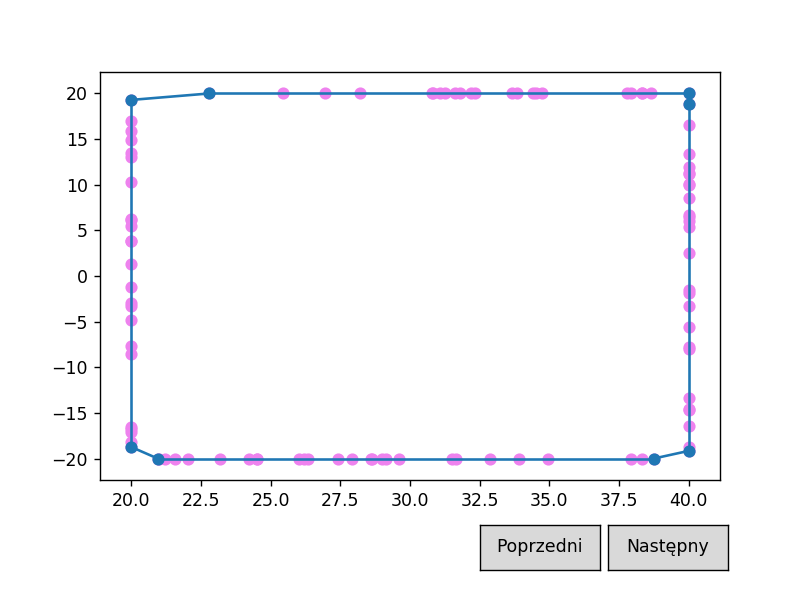

In [370]:

%matplotlib notebook

convexHull1 = Graham(randPoints,10**-10)
convexHull2 = Jarvis(randPoints,10**-10)
convexHull3 = Graham(square,10**-10)
convexHull4 = Jarvis(square,10**-10)
convexHull5 = Graham(pointsCircle,10**-10)
convexHull6 = Jarvis(pointsCircle,10**-10)
convexHull7 = Graham(crossSquare,10**-10)
convexHull8 = Jarvis(crossSquare,10**-10)

visualizeConvexHull(randPoints,convexHull1)

scenes=[visualizeConvexHull(randPoints,convexHull1),
        visualizeConvexHull(randPoints,convexHull2),
        visualizeConvexHull(square,convexHull3),
        visualizeConvexHull(square,convexHull4),
        visualizeConvexHull(pointsCircle,convexHull5),
        visualizeConvexHull(pointsCircle,convexHull6),
        visualizeConvexHull(crossSquare,convexHull7),
        visualizeConvexHull(crossSquare,convexHull8),
       Scene([PointsCollection([(1,1)]),PointsCollection([(1,1)], color = 'green')])]
       
plot = Plot(scenes)
plot.draw()

<IPython.core.display.Javascript object>


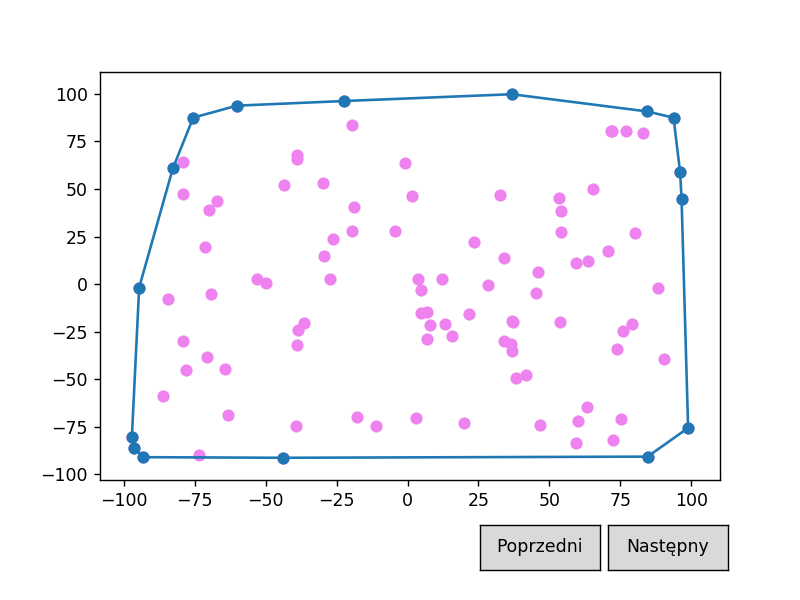

In [350]:
import copy


def pushToConvexHullVisualize(convexHull, point, points, eps, pointsCol, linesCol,consideredPoints,scenes):
    detResult = determiner1(convexHull[-2], convexHull[-1], point)
    consideredPoints.append(point)
    while(detResult < -eps):
        scenes.append(Scene([PointsCollection(points, 'violet'),PointsCollection(copy.deepcopy(pointsCol)),
                            PointsCollection(copy.deepcopy(consideredPoints),'red')]
                ,[LinesCollection(copy.deepcopy(linesCol))]))        
        convexHull.pop()
        pointsCol.pop()
        linesCol.pop()
        scenes.append(Scene([PointsCollection(points, 'violet'),PointsCollection(copy.deepcopy(pointsCol)),
                            PointsCollection(copy.deepcopy(consideredPoints),'red')]
                ,[LinesCollection(copy.deepcopy(linesCol))]))
        detResult = determiner1(convexHull[-2], convexHull[-1], point)
    if(abs(detResult)<= eps):
        convexHull.pop()
        pointsCol.pop()
        linesCol.pop()
        scenes.append(Scene([PointsCollection(points, 'violet'),PointsCollection(copy.deepcopy(pointsCol)),
                            PointsCollection(copy.deepcopy(consideredPoints),'red')]
                ,[LinesCollection(copy.deepcopy(linesCol))]))
        convexHull.append(point)
        pointsCol.append(point)
        linesCol.append([pointsCol[-2],pointsCol[-1]])
        scenes.append(Scene([PointsCollection(points, 'violet'),PointsCollection(copy.deepcopy(pointsCol)),
                            PointsCollection(copy.deepcopy(consideredPoints),'red')]
                ,[LinesCollection(copy.deepcopy(linesCol))]))
    elif(detResult > 0):
        scenes.append(Scene([PointsCollection(points, 'violet'),PointsCollection(copy.deepcopy(pointsCol)),
                            PointsCollection(copy.deepcopy(consideredPoints),'red')]
                ,[LinesCollection(copy.deepcopy(linesCol))]))
        convexHull.append(point)
        pointsCol.append(point)
        linesCol.append([pointsCol[-2],pointsCol[-1]])
        scenes.append(Scene([PointsCollection(points, 'violet'),PointsCollection(copy.deepcopy(pointsCol))]
                ,[LinesCollection(copy.deepcopy(linesCol))]))
    consideredPoints.pop()
    

def GrahamVisualize(points,epsilon):
    convexPoints = points.copy()
    minimalpoint,_ = bottomLeft(points)
    convexPoints.remove(minimalpoint)
    compare = functools.partial(orientation,det=determiner1, a=minimalpoint, eps=epsilon)
    sortedPoints = sorted(convexPoints, key=functools.cmp_to_key(compare), reverse = True)
    convexHull = [minimalpoint,sortedPoints[0]]
    pointsCol = [minimalpoint,sortedPoints[0]]
    consideredPoints = []
    linesCol = [[minimalpoint,sortedPoints[0]]]
    scenes = [Scene([PointsCollection(points, 'violet'),PointsCollection(copy.deepcopy(pointsCol))]
                ,[LinesCollection(copy.deepcopy(linesCol))])]
    for point in sortedPoints[1:]:
        pushToConvexHullVisualize(convexHull,point,points,epsilon,pointsCol,linesCol,consideredPoints,scenes)
    linesCol.append([pointsCol[0],pointsCol[-1]])
    scenes.append(Scene([PointsCollection(points, 'violet'),PointsCollection(pointsCol.copy())]
                ,[LinesCollection(linesCol)]))
    return scenes,convexHull

    

In [351]:
rand = getRandomPoints(30,0,10)

<IPython.core.display.Javascript object>


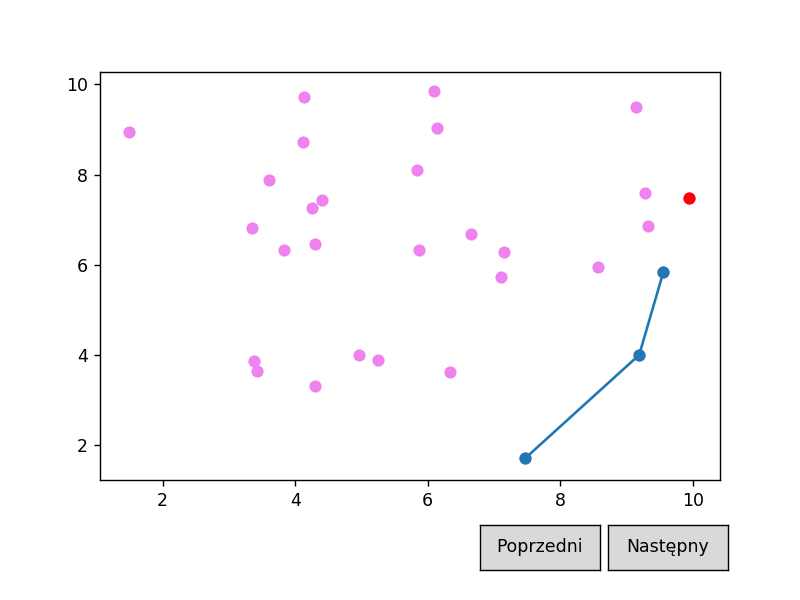

In [354]:

scenes,hull = GrahamVisualize(rand,10**-10)
hull1 = Graham(rand,10**-10)
plot = Plot(scenes)
plot.draw()

In [356]:
def JarvisVisualize(points, eps):
    _, minIndex = bottomLeft(points)
    lastPoint = minIndex
    convexHull = []
    
    pointsCol = [points[lastPoint]]
    consideredPoints = []
    consideredLine = []
    linesCol = []
    scenes = [Scene([PointsCollection(points, 'violet'),PointsCollection(copy.deepcopy(pointsCol))],
                    [LinesCollection(copy.deepcopy(linesCol))])]
                
    
    while(True):
        convexHull.append(points[lastPoint])
        nextPoint = (lastPoint+1)%len(points)
        
        for i in range(len(points)):
            if i != lastPoint and i != nextPoint:
                consideredPoints.append(points[i])
                consideredLine.append([pointsCol[-1],points[i]])
                scenes.append(Scene([PointsCollection(points, 'violet'),PointsCollection(copy.deepcopy(pointsCol)),
                PointsCollection(copy.deepcopy(consideredPoints), 'red')]
               ,[LinesCollection(copy.deepcopy(linesCol)),LinesCollection(copy.deepcopy(consideredLine),'red')]))
                consideredPoints.pop()
                consideredLine.pop()
                detResult = determiner1(points[lastPoint], points[nextPoint],points[i])
                if detResult < -eps :
                    nextPoint = i
                elif abs(detResult) <= eps:
                    if squaredDist(points[lastPoint],points[nextPoint]) < squaredDist(points[lastPoint],points[i]):
                        nextPoint = i
        lastPoint = nextPoint
        pointsCol.append(points[lastPoint])
        linesCol.append([pointsCol[-2],pointsCol[-1]])
        scenes.append(Scene([PointsCollection(points, 'violet'),PointsCollection(copy.deepcopy(pointsCol))]
               ,[LinesCollection(copy.deepcopy(linesCol))]))
        if lastPoint == minIndex:
            break
    return scenes

<IPython.core.display.Javascript object>


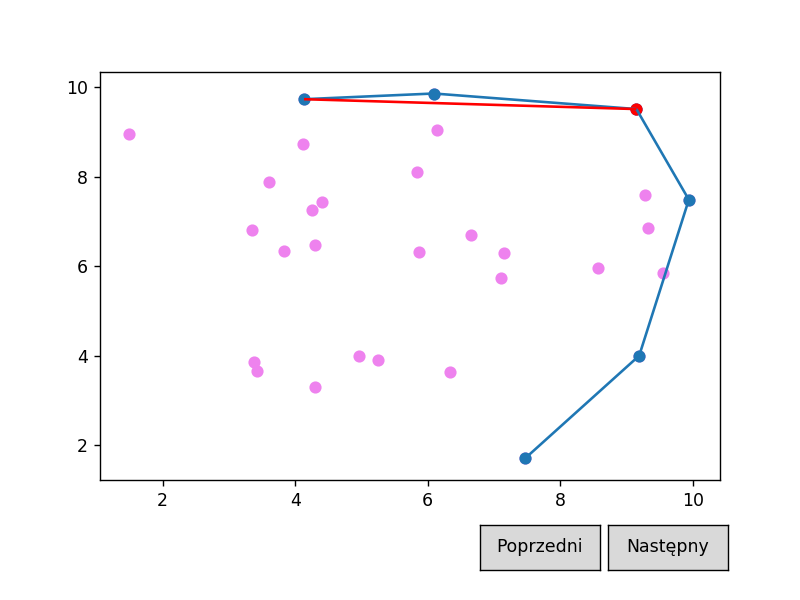

In [357]:

scenes = JarvisVisualize(rand,10**-10)
plot = Plot(scenes)

plot.draw()

<IPython.core.display.Javascript object>


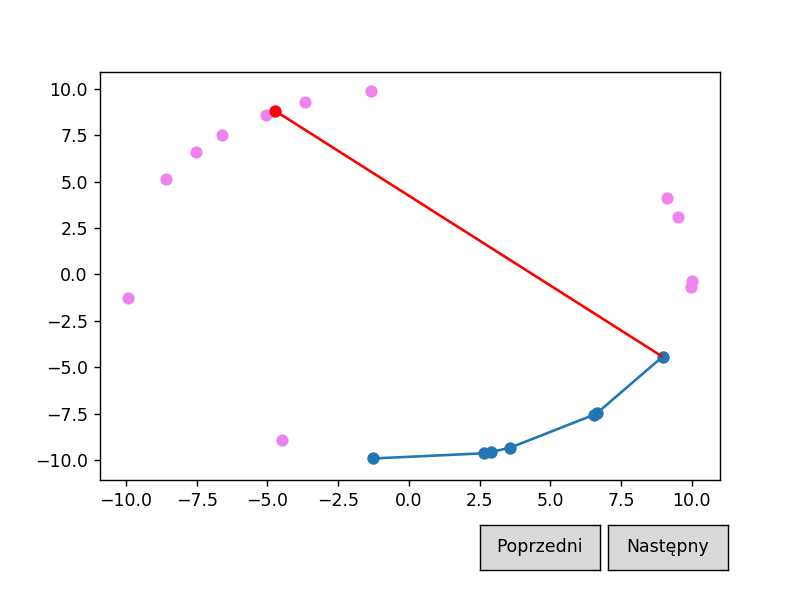

In [364]:
scenes = JarvisVisualize(pointsCircle,10**-10)
plot = Plot(scenes)

plot.draw()

<IPython.core.display.Javascript object>


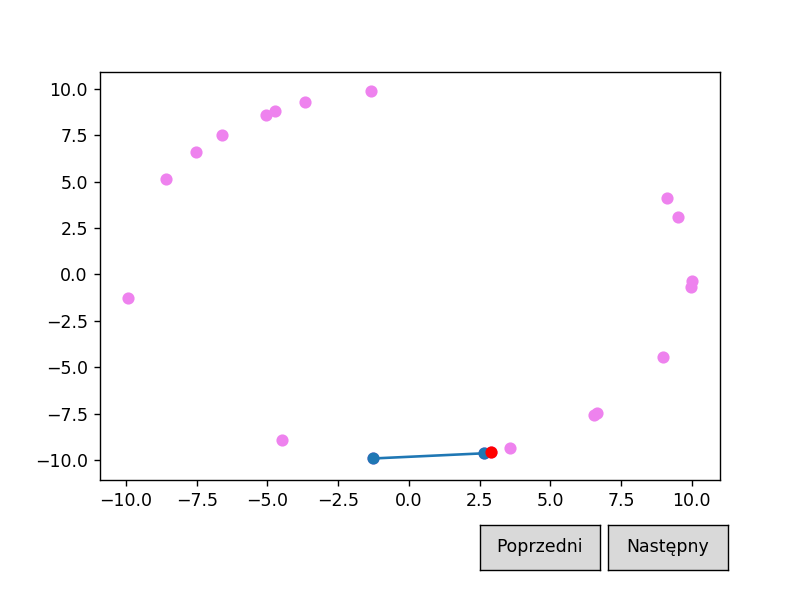

In [365]:
scenes,_ = GrahamVisualize(pointsCircle,10**-10)
plot = Plot(scenes)

plot.draw()

<IPython.core.display.Javascript object>


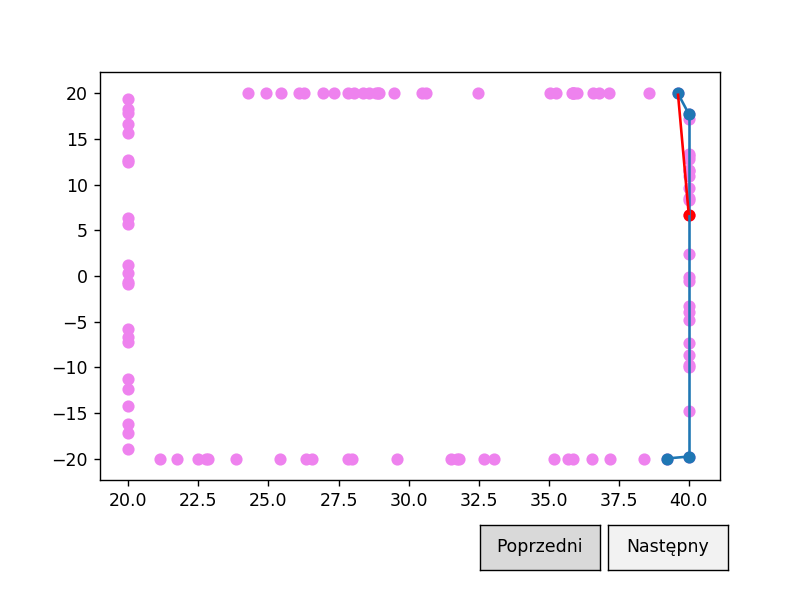

In [367]:
scenes = JarvisVisualize(square,10**-10)
plot = Plot(scenes)

plot.draw()

<IPython.core.display.Javascript object>


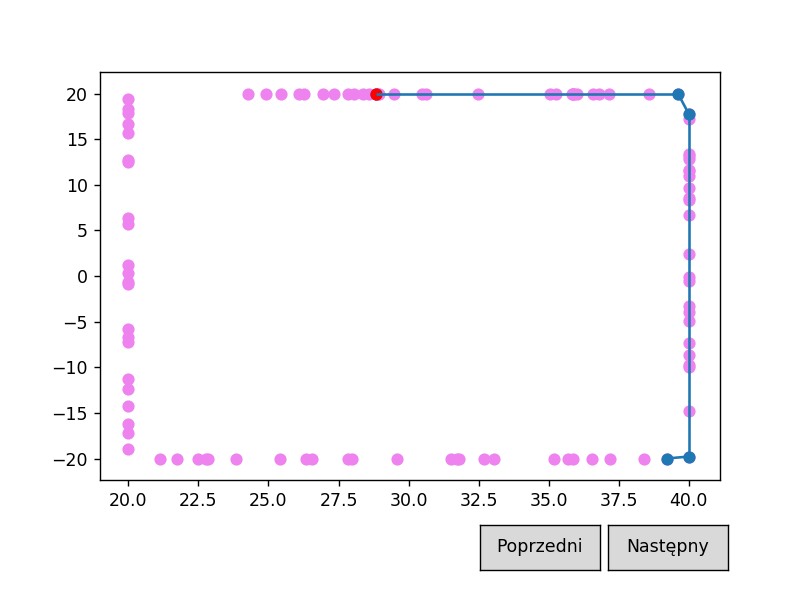

In [366]:
scenes,_ = GrahamVisualize(square,10**-10)
plot = Plot(scenes)

plot.draw()